# Convolutional NN

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        self.conv1=nn.Conv2d(1, 6, 5)
        self.pool1=nn.MaxPool2d(2, stride=2)
        self.conv2=nn.Conv2d(6, 16, 5)
        self.pool2=nn.MaxPool2d(2, stride=2)
        self.fc1=nn.Linear(16*5*5, 120)
        self.fc2=nn.Linear(120, 84)
        self.fc3=nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x
              

In [3]:
lenet=LeNet()
print(lenet)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [4]:
params = list(lenet.parameters())
for params in params:
    print(params.size())


torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [5]:
transform=transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
BatchSize=10
trainset= datasets.MNIST(root='./data', train=True, download=False, transform=transform)
trainloader= torch.utils.data.DataLoader(trainset, batch_size=BatchSize, shuffle=True)

In [6]:
data=next(iter(trainloader))
input, label=data

label

tensor([6, 2, 3, 0, 0, 5, 2, 5, 4, 7])

In [7]:
input.size()

torch.Size([10, 1, 32, 32])

In [8]:
output=lenet(input)
output

tensor([[0.0911, 0.0954, 0.1074, 0.0955, 0.1120, 0.1000, 0.0961, 0.1092, 0.0975,
         0.0960],
        [0.0911, 0.0949, 0.1067, 0.0958, 0.1112, 0.1004, 0.0966, 0.1091, 0.0979,
         0.0963],
        [0.0906, 0.0953, 0.1078, 0.0956, 0.1105, 0.0998, 0.0965, 0.1095, 0.0978,
         0.0965],
        [0.0909, 0.0959, 0.1070, 0.0964, 0.1106, 0.0996, 0.0961, 0.1089, 0.0977,
         0.0969],
        [0.0907, 0.0959, 0.1067, 0.0960, 0.1108, 0.1003, 0.0963, 0.1087, 0.0977,
         0.0969],
        [0.0909, 0.0960, 0.1075, 0.0957, 0.1111, 0.0994, 0.0961, 0.1094, 0.0978,
         0.0961],
        [0.0907, 0.0960, 0.1062, 0.0958, 0.1110, 0.1000, 0.0970, 0.1090, 0.0975,
         0.0968],
        [0.0909, 0.0956, 0.1070, 0.0957, 0.1110, 0.1000, 0.0964, 0.1092, 0.0970,
         0.0973],
        [0.0906, 0.0958, 0.1067, 0.0951, 0.1115, 0.1002, 0.0966, 0.1093, 0.0970,
         0.0972],
        [0.0909, 0.0955, 0.1068, 0.0957, 0.1107, 0.1007, 0.0973, 0.1094, 0.0971,
         0.0959]], grad_fn=<

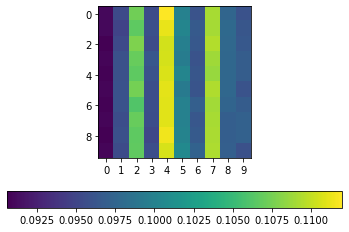

In [9]:
def show_tensor(x):
    plt.figure()
    plt.xticks(np.arange(0,10,1))
    plt.imshow(x)
    plt.colorbar(orientation='horizontal')
    plt.show
show_tensor(output.detach().numpy())